In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

def generate_random_map(size, obstacle_chance):
    return (np.random.randint(low=0, high=int(1/obstacle_chance)+1, size=(size,size),)*obstacle_chance).astype(int)


In [2]:
m = generate_random_map(10, 0.2)

In [3]:
def plot_map(map, start, finish, agent_pos=None, visited=None):
    m2 = map.copy()
    m2[start] = 4
    m2[finish] = 5
    if agent_pos is not None:
        m2[agent_pos] = 8
    if visited is not None:
        for case in visited:
            m2[case] = 6
    plt.imshow(m2)

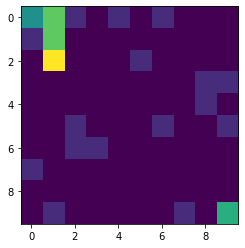

In [4]:
plot_map(m, start=(0,0), finish=(9,9), agent_pos = (2,1), visited=[(0,1),(1,1)])

# Modifiez votre parcours en profondeur pour afficher le parcours de votre agent sur la map

- je vous aide : voici la fonction get_children, qui ne vous retournera que les cases adjacentes sans obstacle

In [5]:
def get_children(m, pos):
    children = []
    x, y = pos
    if x-1 >=0 and m[x-1,y]!=1:
        children.append((x-1,y))
    if x+1 < m.shape[0]  and m[x+1,y]!=1:
        children.append((x+1,y))
    if y-1 >=0 and m[x,y-1]!=1:
        children.append((x,y-1))
    if y+1 < m.shape[1]  and m[x,y+1]!=1:
        children.append((x,y+1))
    return children

Implémentez votre heuristique h

In [6]:
def h(pos, finish):
    x,y = pos
    x_f, y_f = finish
    return abs(x-x_f)+ abs(y-y_f)

In [7]:
h((0,0),(9,9))

18

Implémentez maintenant l'algorithme a* à partir de votre parcour en profondeur et de votre heuristique h
- indice : g peut être calculé comme g(fils) = g(pere)+1 si g(fils) n'a pas déjà été trouvé, sinon comme g(fils) = min(g(fils), g(pere)+1)

In [8]:
import time
def astar(m, start, finish):
    visited = set()
    to_visit = [start]
    g = np.full(m.shape, m.size)
    f = np.full(m.shape, m.size)
    n_room_explored = 0
    while len(to_visit)> 0:
        node_visited = to_visit[0]
        for i, node in enumerate(to_visit):
            if f[node] < f[node_visited]:
                node_visited = node
                
        to_visit.remove(node_visited)
        n_room_explored += 1
        children = get_children(m, node_visited)
        visited.add(node_visited)
        if finish in children:
            print("Found the exit in ", n_room_explored, " steps")
            plot_map(m, start=(0,0), finish=(9,9), visited=visited)
            return n_room_explored
        
        new_nodes = [child for child in children if not (child in visited) 
                     and not (child in to_visit)]
        
        for child in children:
            if not child in visited:
                g[child] = min(g[node_visited]+1, g[child])
                f[child] = g[child] + h(child, finish)
        
        to_visit += new_nodes
        
    print("exit not found")

Found the exit in  20  steps


20

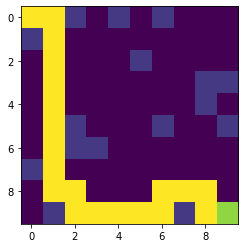

In [9]:
astar(m, (0,0), (9,9))